In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data.drop(columns=['customerID'], inplace=True)

In [9]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le=LabelEncoder()
data['gender']=le.fit_transform(data['gender'])

In [12]:
data['gender'].value_counts()

1    3555
0    3488
Name: gender, dtype: int64

In [18]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [19]:
data['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [20]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [21]:
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [22]:
data['InternetService']=le.fit_transform(data['InternetService'])
data['MultipleLines']=le.fit_transform(data['MultipleLines'])
data['Contract']=le.fit_transform(data['Contract'])
data['PaymentMethod']=le.fit_transform(data['PaymentMethod'])

In [23]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [24]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,Yes,No,1,No,1,0,No,Yes,No,No,No,No,0,Yes,2,29.85,29.85,No
1,1,0,No,No,34,Yes,0,0,Yes,No,Yes,No,No,No,1,No,3,56.95,1889.5,No
2,1,0,No,No,2,Yes,0,0,Yes,Yes,No,No,No,No,0,Yes,3,53.85,108.15,Yes
3,1,0,No,No,45,No,1,0,Yes,No,Yes,Yes,No,No,1,No,0,42.30,1840.75,No
4,0,0,No,No,2,Yes,0,1,No,No,No,No,No,No,0,Yes,2,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,Yes,Yes,24,Yes,2,0,Yes,No,Yes,Yes,Yes,Yes,1,Yes,3,84.80,1990.5,No
7039,0,0,Yes,Yes,72,Yes,2,1,No,Yes,Yes,No,Yes,Yes,1,Yes,1,103.20,7362.9,No
7040,0,0,Yes,Yes,11,No,1,0,Yes,No,No,No,No,No,0,Yes,2,29.60,346.45,No
7041,1,1,Yes,No,4,Yes,2,1,No,No,No,No,No,No,0,Yes,3,74.40,306.6,Yes


In [25]:
data['Partner']=le.fit_transform(data['Partner'])
data['Dependents']=le.fit_transform(data['Dependents'])
data['PhoneService']=le.fit_transform(data['PhoneService'])
data['OnlineSecurity']=le.fit_transform(data['OnlineSecurity'])
data['OnlineBackup']=le.fit_transform(data['OnlineBackup'])
data['DeviceProtection']=le.fit_transform(data['DeviceProtection'])
data['TechSupport']=le.fit_transform(data['TechSupport'])
data['StreamingTV']=le.fit_transform(data['StreamingTV'])
data['StreamingMovies']=le.fit_transform(data['StreamingMovies'])
data['PaperlessBilling']=le.fit_transform(data['PaperlessBilling'])

In [26]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,No
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,No
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,Yes
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,No
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.5,No
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.9,No
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,No
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.6,Yes


In [28]:
data.shape

(7043, 20)

In [32]:
data['Churn']=le.fit_transform(data['Churn'])

In [40]:
data['MonthlyCharges'] = data['MonthlyCharges'].astype(int)

In [42]:
type(data['TotalCharges'])

pandas.core.series.Series

In [49]:
data['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [38]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84,1990.5,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103,7362.9,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74,306.6,1


In [64]:
data.drop(columns=['TotalCharges'],inplace=True)

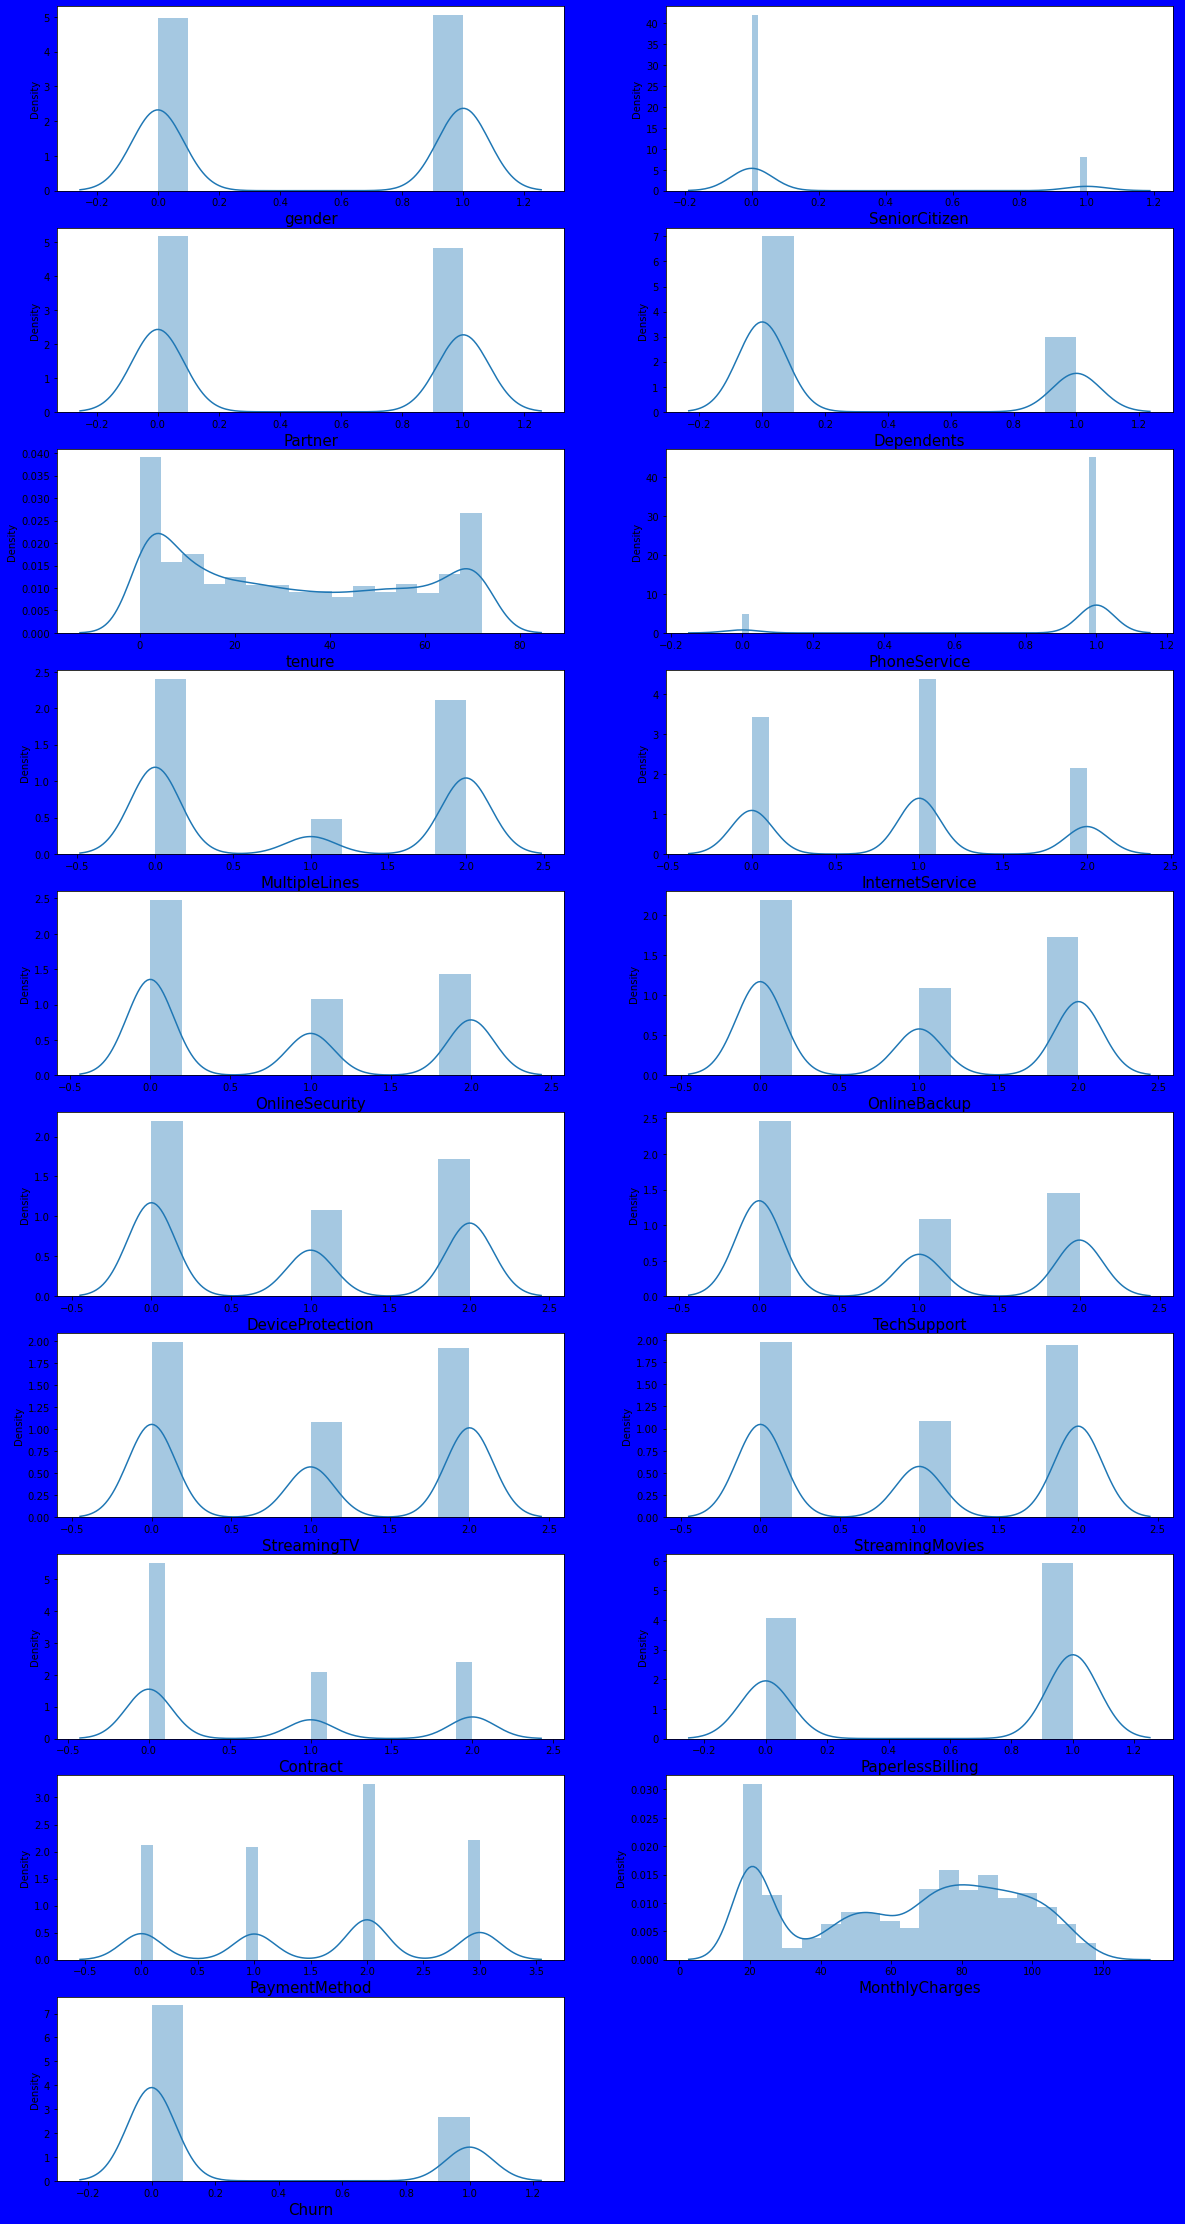

In [74]:
plt.figure(figsize=(20,40), facecolor='blue')
plotnumber=1

for column in data:
    if plotnumber<=20 :
        ax= plt.subplot(10,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.show()

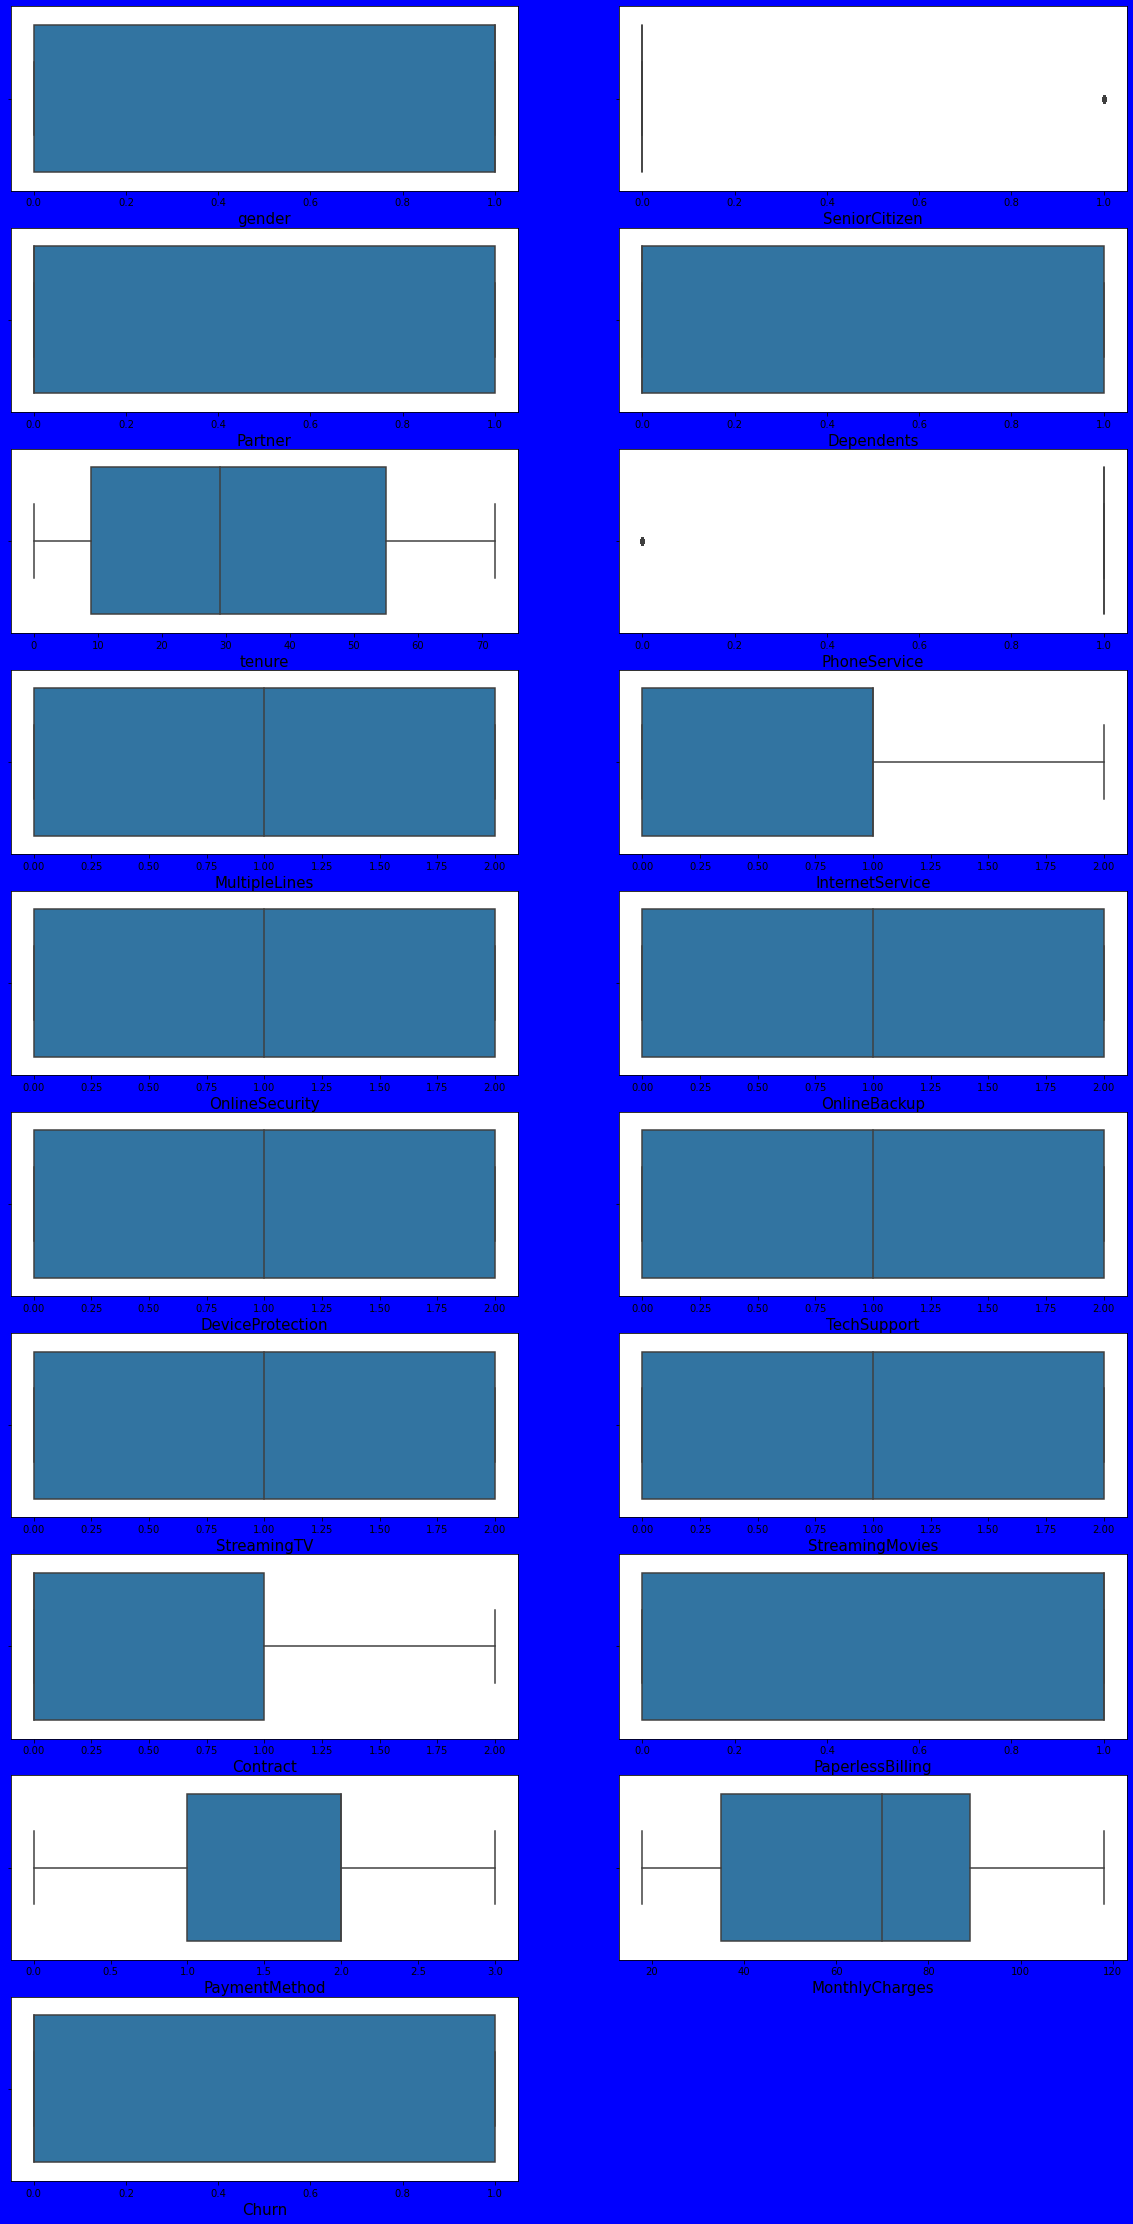

In [75]:
plt.figure(figsize=(20,40), facecolor='blue')
plotnumber=1

for column in data:
    if plotnumber<=20 :
        ax= plt.subplot(10,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.show()

In [76]:
data['tenure']=data['tenure'].replace(0,data['tenure'].mean())

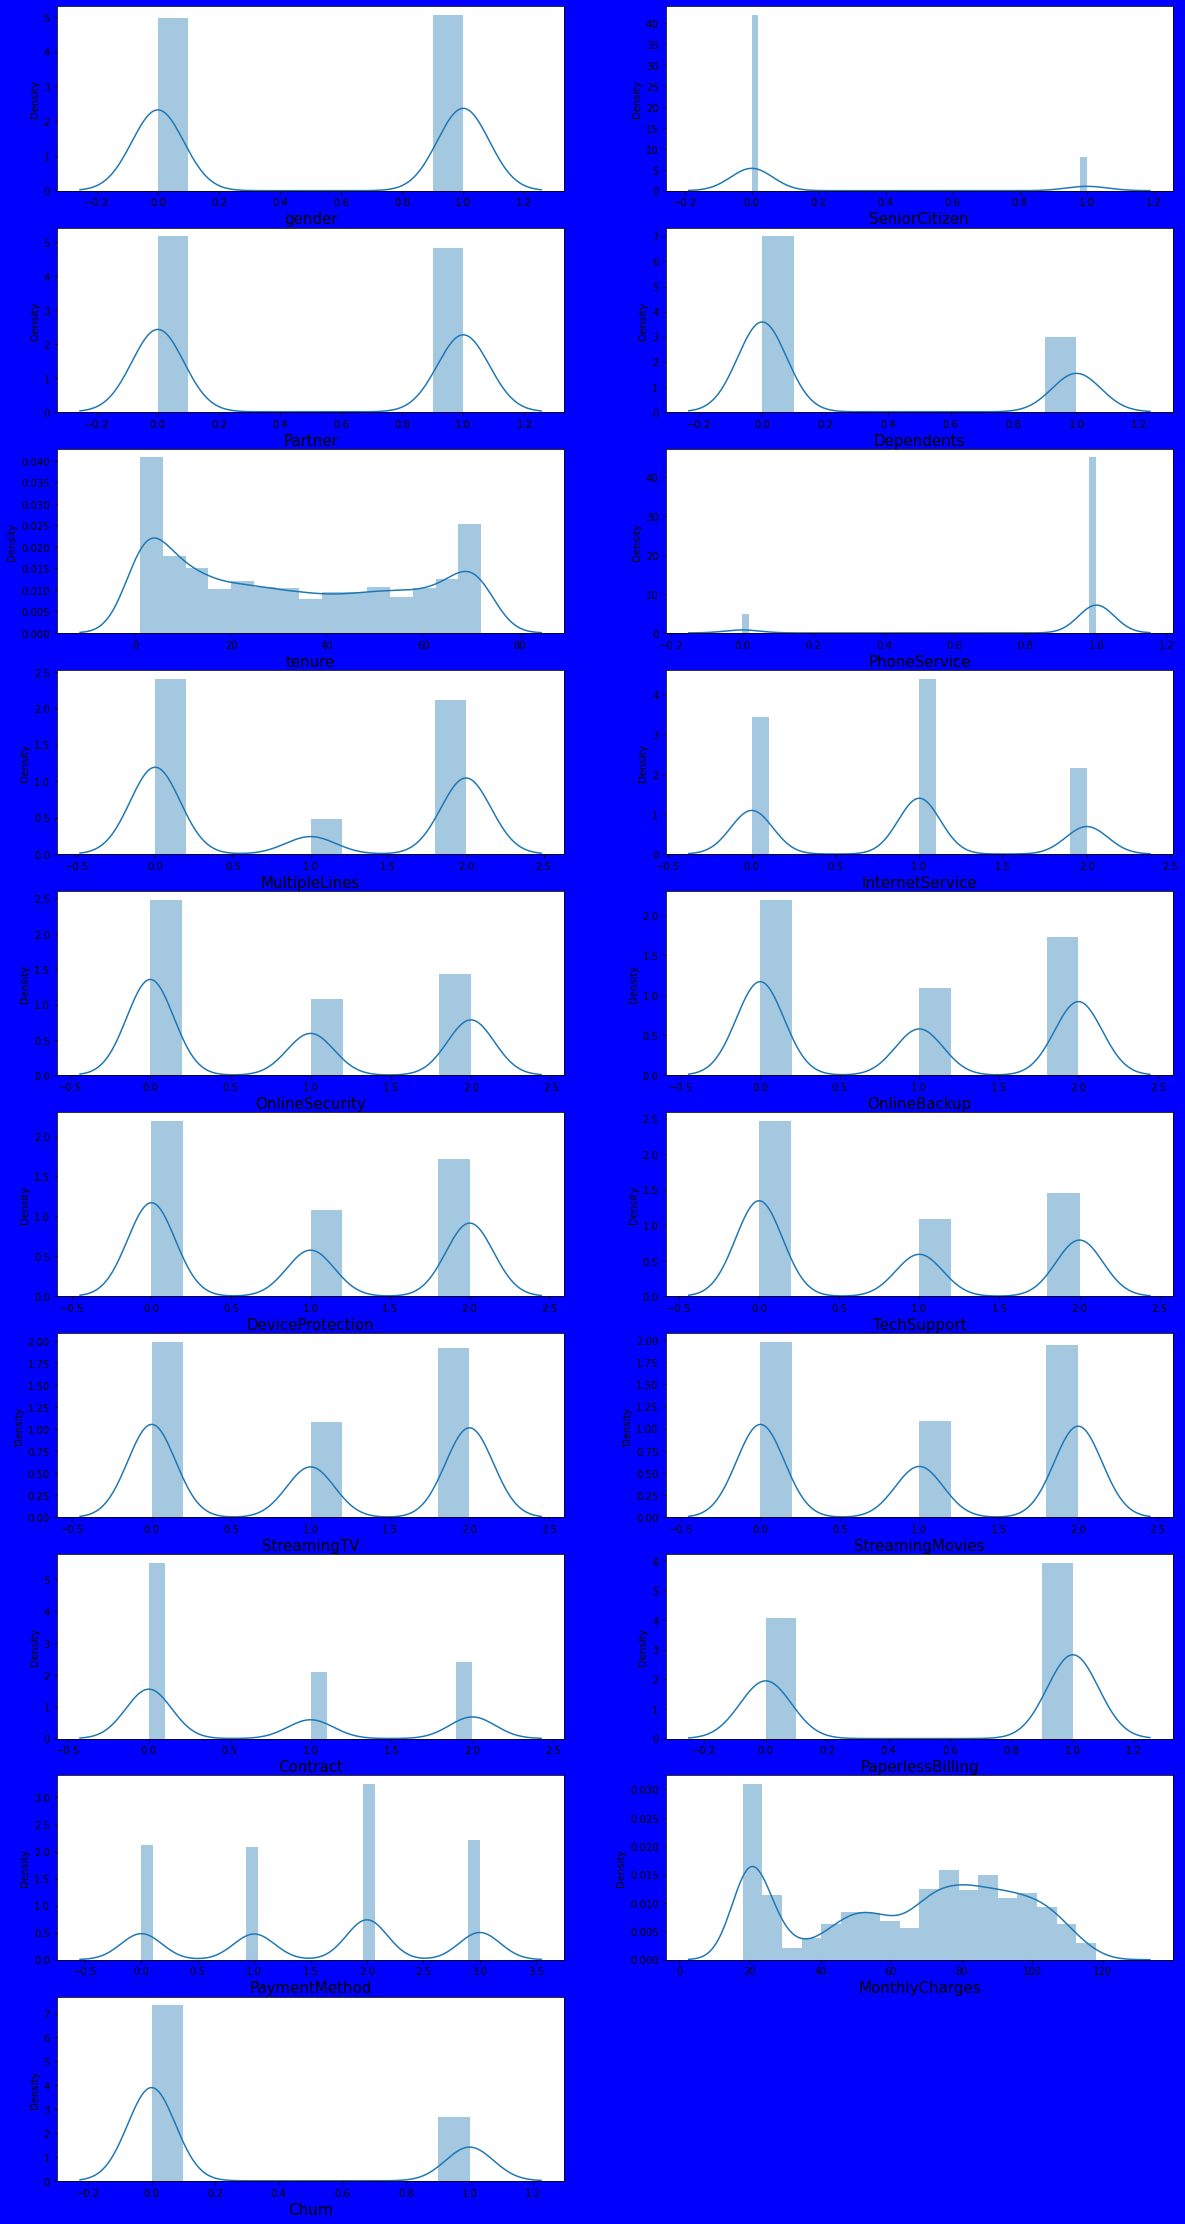

In [77]:
plt.figure(figsize=(20,40), facecolor='blue')
plotnumber=1

for column in data:
    if plotnumber<=20 :
        ax= plt.subplot(10,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.show()

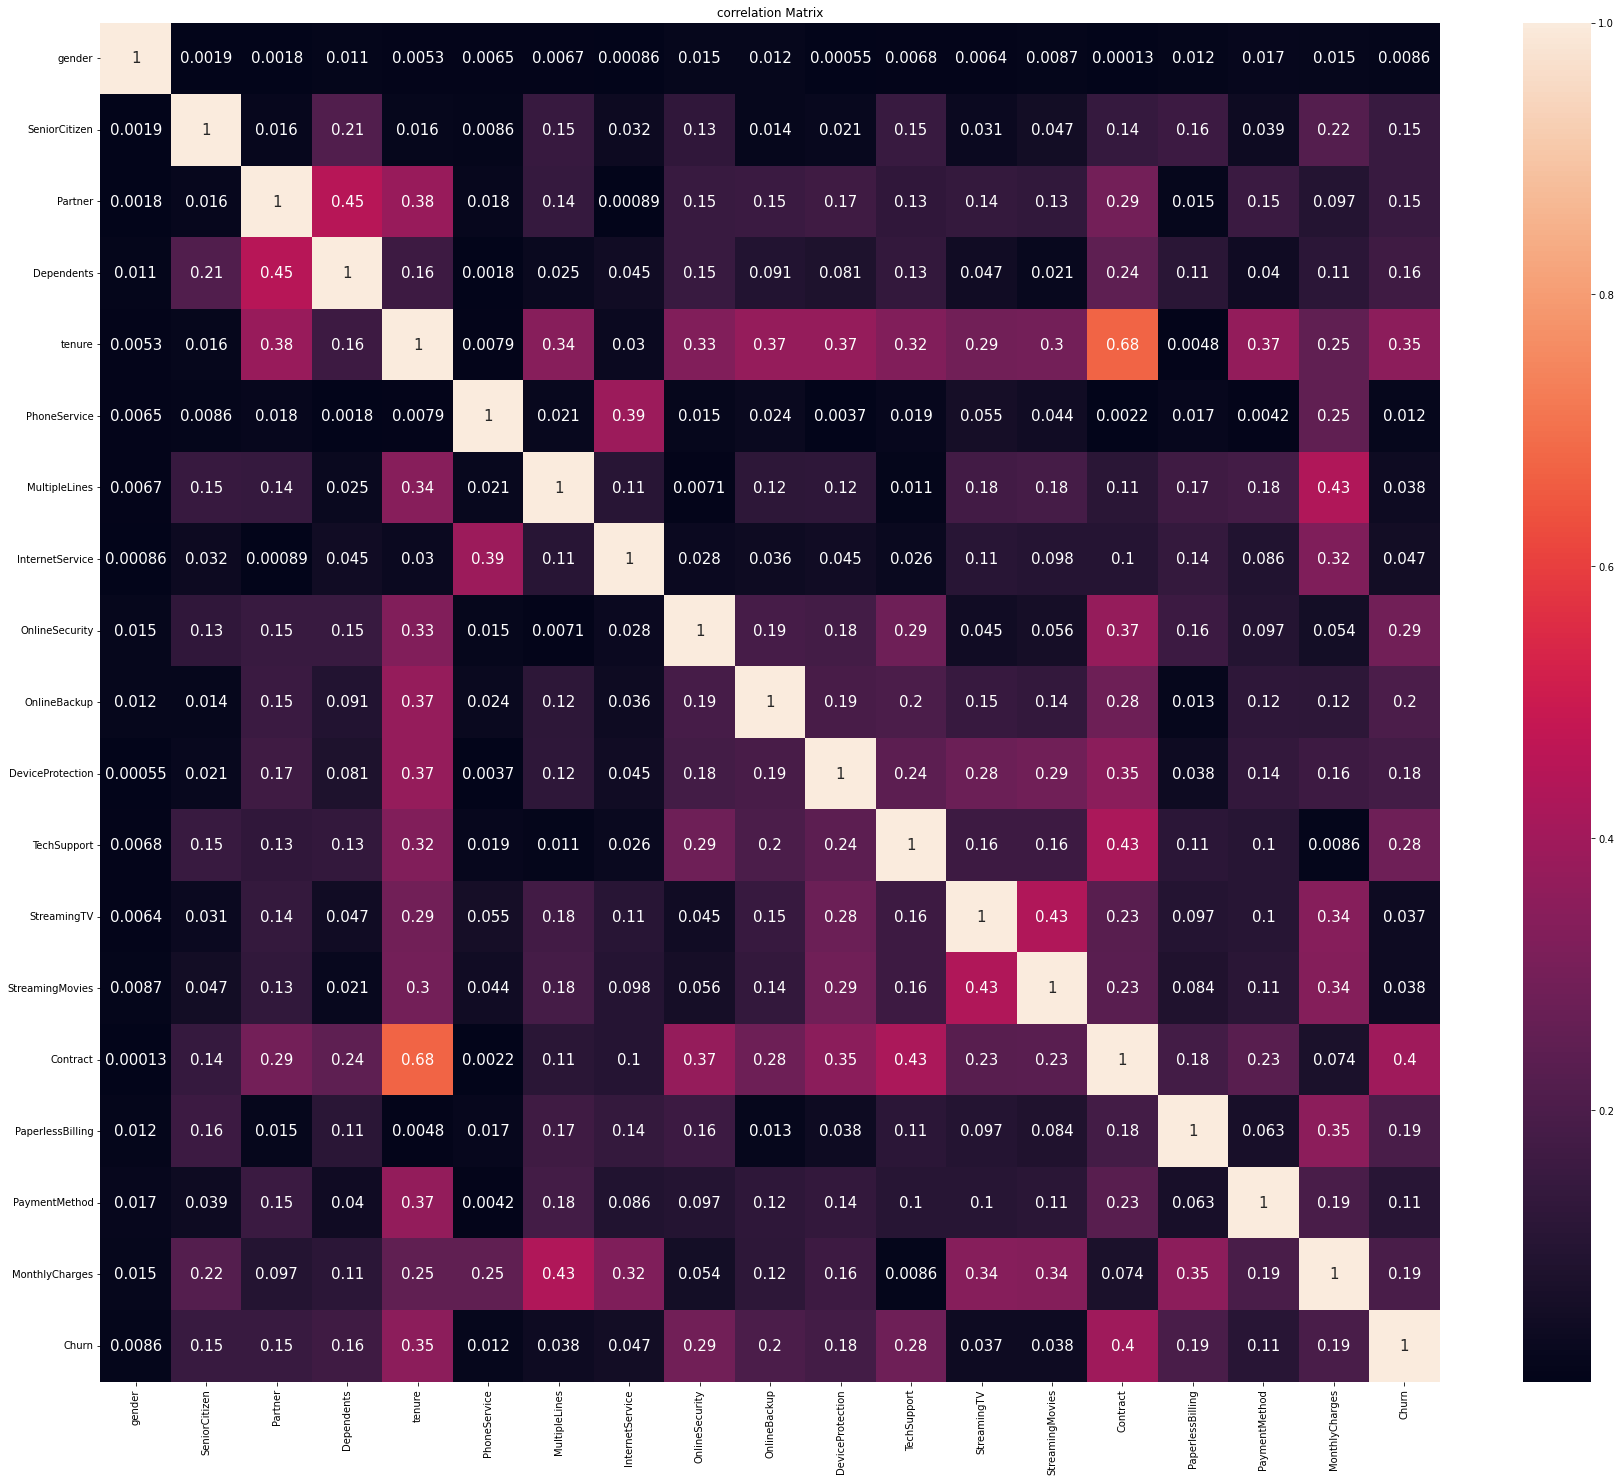

In [86]:
corr_mat=data.corr().abs()
plt.figure(figsize=[30,25])
sns.heatmap(corr_mat,annot=True,annot_kws= {'size':15})
plt.title("correlation Matrix")
plt.show()

In [87]:
x=data.drop(columns=['Churn'])
y=data['Churn']

In [88]:
scalar=StandardScaler()
x_scaled= scalar.fit_transform(x)

In [93]:
x_scaled.shape

(7043, 18)

In [96]:
x_train,x_test,y_train,y_test= train_test_split(x_scaled,y,test_size=0.25,random_state=264)

In [97]:
LR=LogisticRegression()

In [99]:
LR.fit(x_train,y_train)

LogisticRegression()

In [100]:
y_pred=LR.predict(x_test)

In [101]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8040885860306644

In [102]:
CF=confusion_matrix(y_test,y_pred)
CF

array([[1157,  147],
       [ 198,  259]], dtype=int64)

In [103]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1304
           1       0.64      0.57      0.60       457

    accuracy                           0.80      1761
   macro avg       0.75      0.73      0.74      1761
weighted avg       0.80      0.80      0.80      1761



In [104]:
auc_score=roc_auc_score(y_test,y_pred)
auc_score

0.7270047723886106